In [183]:
import sklearn
print(sklearn.__version__)


1.5.1


In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [185]:
data = pd.read_csv("heart_disease_dataset.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [186]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [187]:
type(data)

pandas.core.frame.DataFrame

In [188]:
data.shape

(303, 14)

In [189]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


no missing values in the datasets

In [191]:
data.sample(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
152,64,1,3,170,227,0,0,155,0,0.60,1,0,3,1
270,46,1,0,120,249,0,0,144,0,0.80,2,0,3,0
132,42,1,1,120,295,0,1,162,0,0.00,2,0,2,1
242,64,1,0,145,212,0,0,132,0,2.00,1,2,1,0
203,68,1,2,180,274,1,0,150,1,1.60,1,0,3,0
251,43,1,0,132,247,1,0,143,1,0.10,1,4,3,0
60,71,0,2,110,265,1,0,130,0,0.00,2,1,2,1
57,45,1,0,115,260,0,0,185,0,0.00,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
294,44,1,0,120,169,0,1,144,1,2.80,0,0,1,0


In [192]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Understanding each column better:

In [193]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trtbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalachh:			 maximum heart rate achieved
exng:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slp:			the slope of the peak exercise ST segment
caa:			number of major vessels (0-3) colored by flourosopy
thall:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


analysing the target varaible

In [194]:
data["output"].describe()

count   303.00
mean      0.54
std       0.50
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       1.00
Name: output, dtype: float64

In [195]:
data["output"].unique()

array([1, 0], dtype=int64)

### Clearly, this is a classification problem, since the target variable (which is the output variable) having values '0' and '1'

Checking correlation between columns:

In [196]:
print(data.corr()["output"].abs().sort_values(ascending=False))


output     1.00
exng       0.44
cp         0.43
oldpeak    0.43
thalachh   0.42
caa        0.39
slp        0.35
thall      0.34
sex        0.28
age        0.23
trtbps     0.14
restecg    0.14
chol       0.09
fbs        0.03
Name: output, dtype: float64


### Exploratory Data Analysis (EDA) <a id ="manual_eda"> </a>

In [197]:
data.output.value_counts() 

output
1    165
0    138
Name: count, dtype: int64

output
1    165
0    138
Name: count, dtype: int64


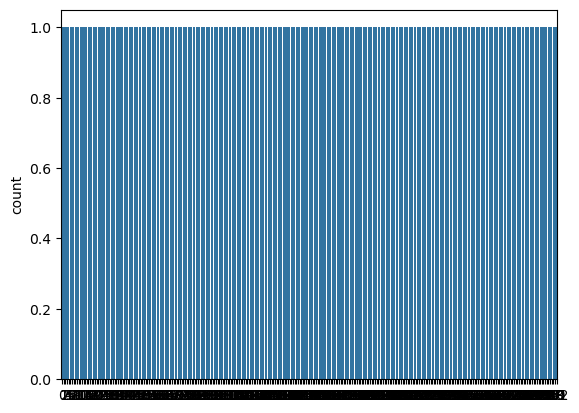

In [198]:
w = data["output"]

sns.countplot(y)


output_temp = data.output.value_counts()

print(output_temp)


In [199]:
print("Percentage of patience without heart problems: "+str(round(output_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(output_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


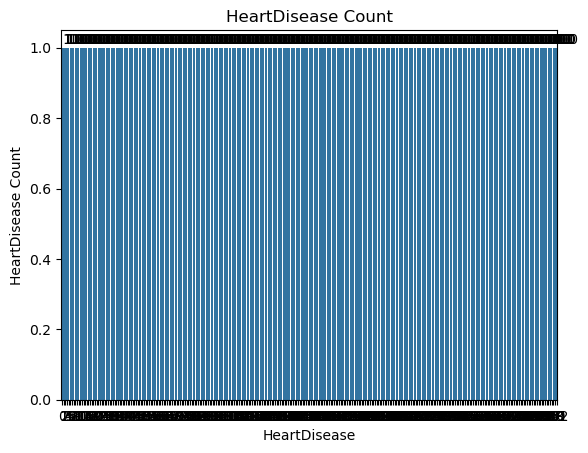

In [200]:
ax=sns.countplot(data['output'])
# Set label for x-axis
ax.set_xlabel( "HeartDisease")

# Set Value for every count
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Set label for y-axis
ax.set_ylabel( "HeartDisease Count")
  
# Set title for plot
ax.set_title(  "HeartDisease Count")
# Display figure
plt.show()

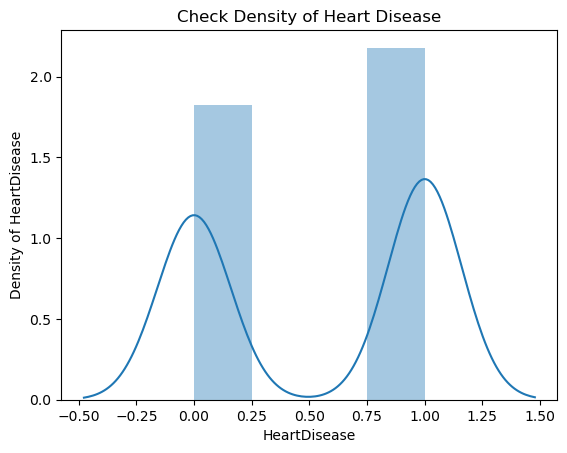

In [201]:
ax=sns.distplot(data['output'])
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

In [202]:
data["sex"].unique()

array([1, 0], dtype=int64)

sex has two feautures

In [203]:
sns.barplot(data["sex"], w)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [ ]:
sns.barplot(data["cp"],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

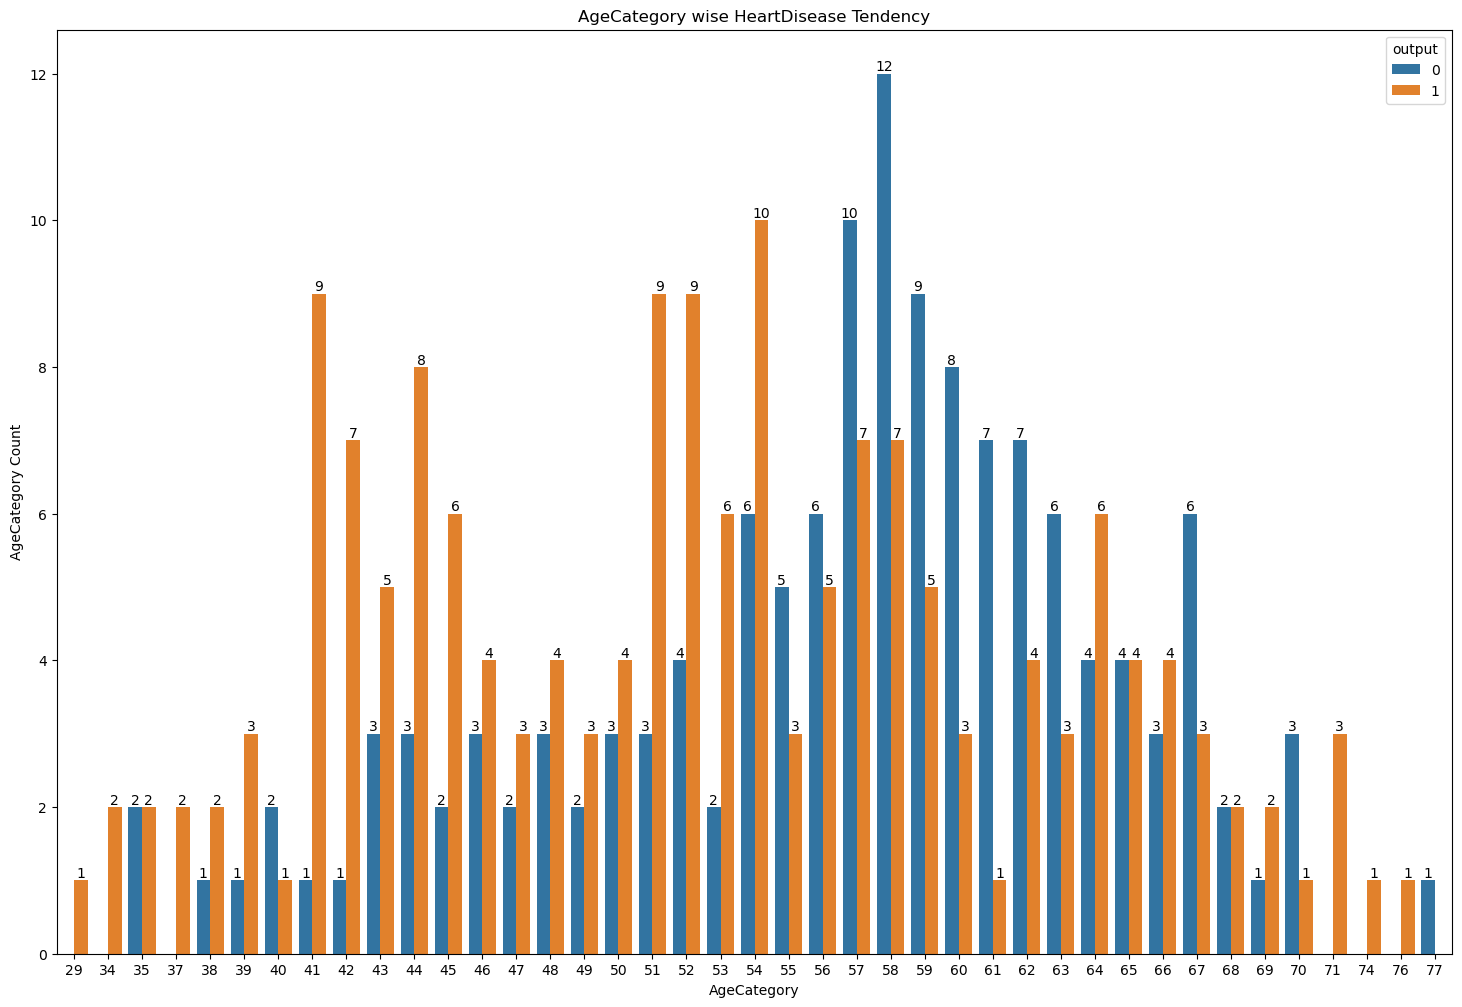

In [ ]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='age', hue='output', data=data)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [ ]:
data["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
data["fbs"].unique()

array([1, 0], dtype=int64)

In [ ]:
sns.barplot(data["fbs"],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='thall', ylabel='Density'>

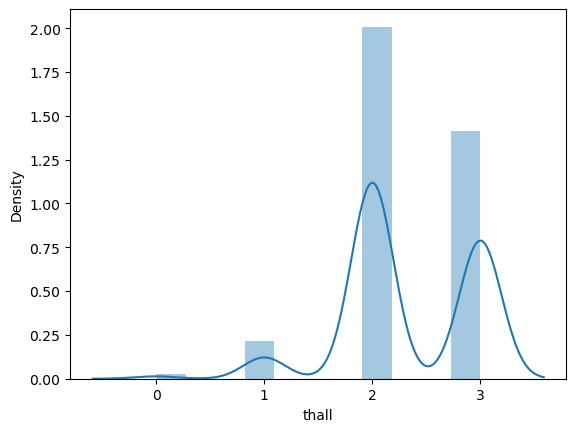

In [204]:
sns.distplot(data["thall"])

<Axes: xlabel='sex', ylabel='Density'>

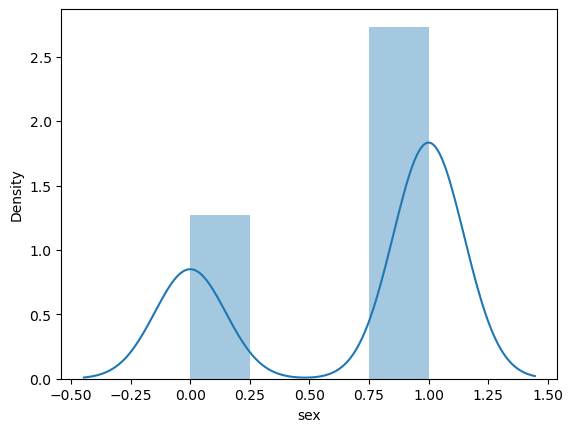

In [205]:
sns.distplot(data["sex"])

<Axes: xlabel='fbs', ylabel='Density'>

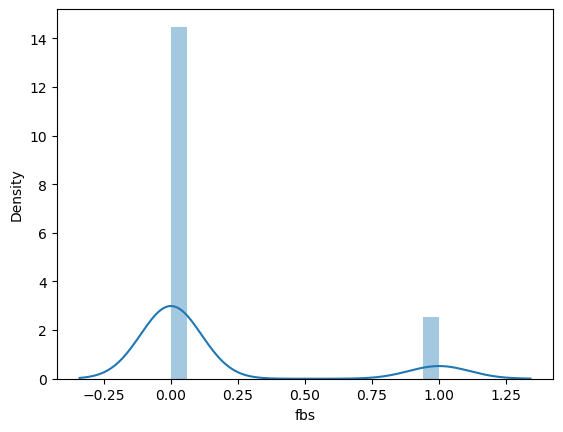

In [206]:
sns.distplot(data["fbs"])

<Axes: xlabel='slp', ylabel='Density'>

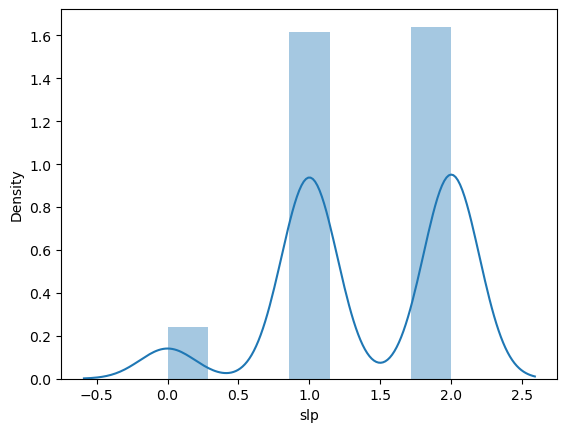

In [207]:
sns.distplot(data["slp"])

In [208]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [209]:
feature =['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

checking for outliers

<Axes: >

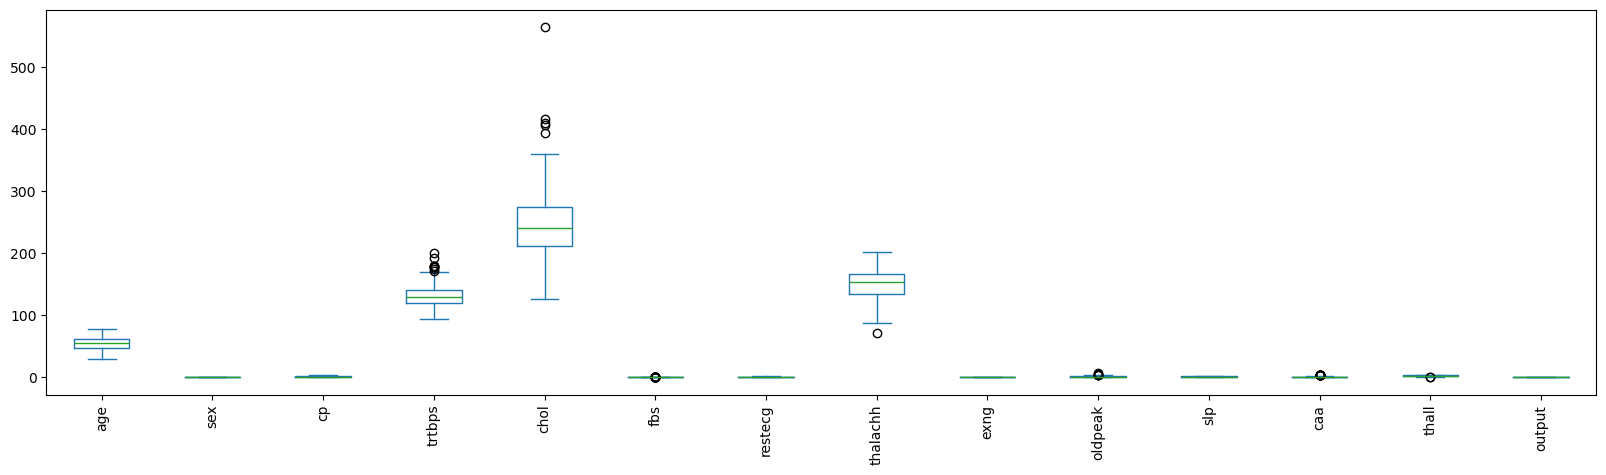

In [210]:
data.plot.box(figsize=(20,5), rot=90)

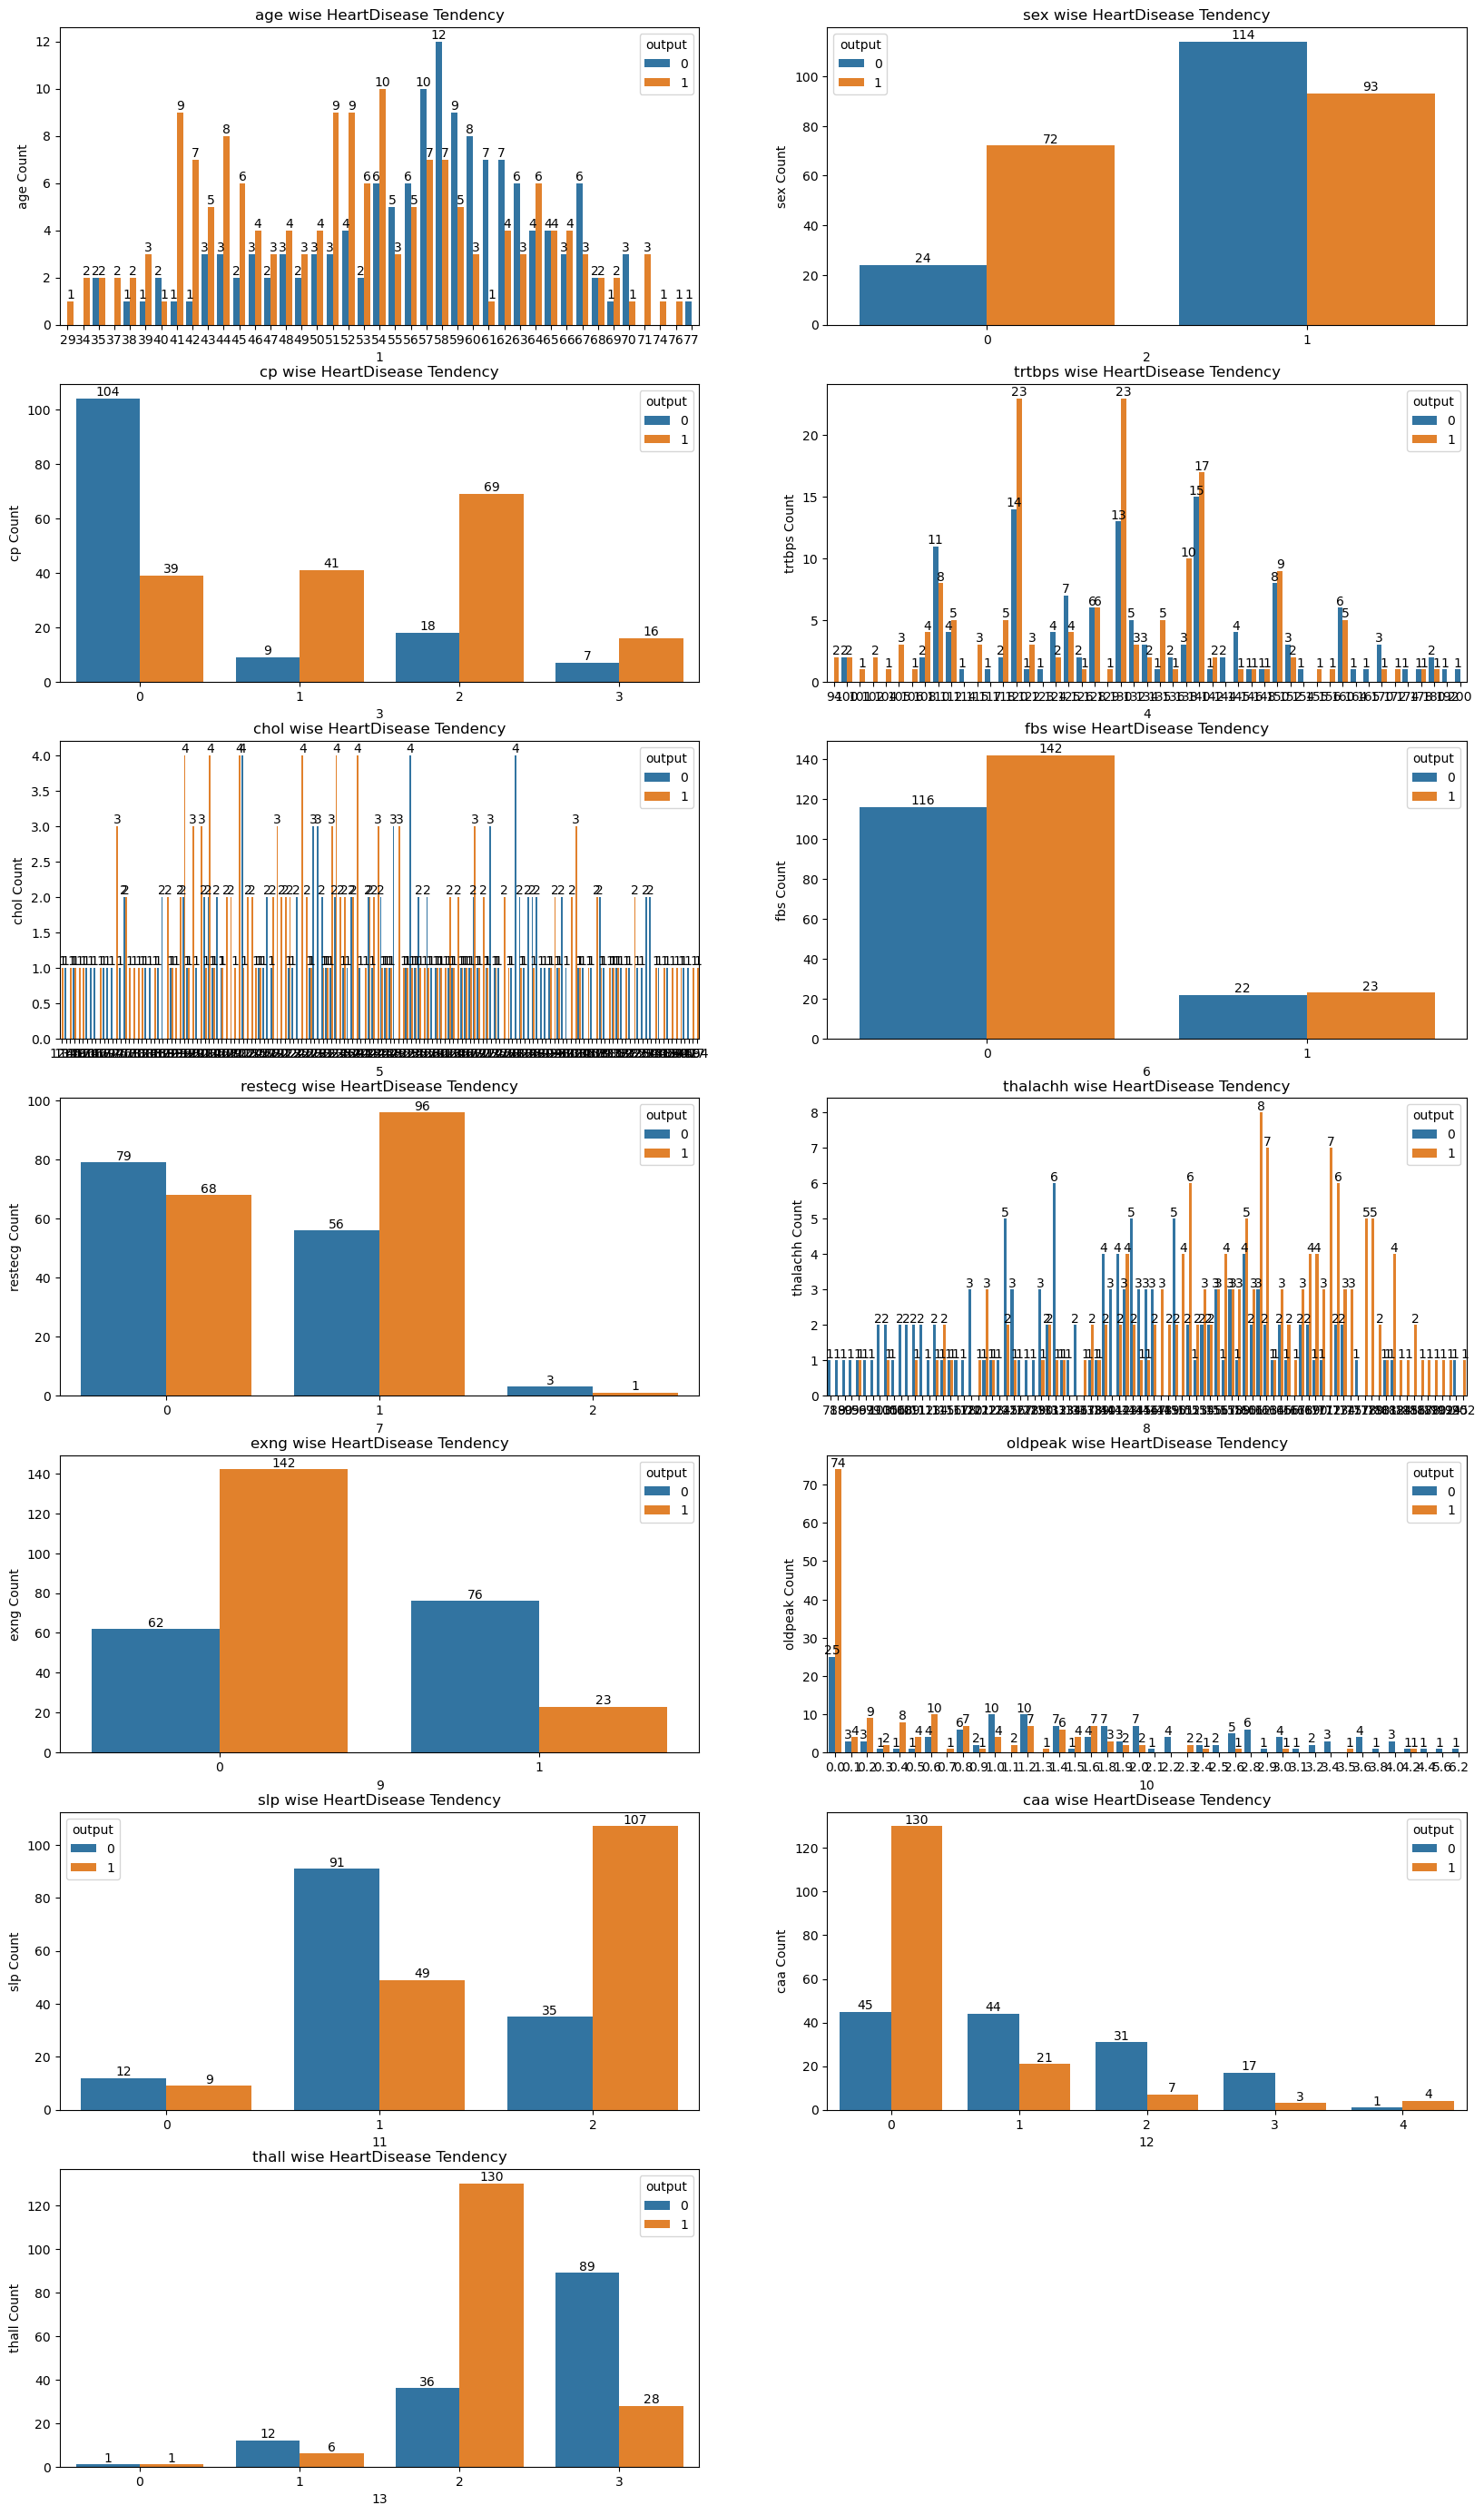

In [211]:
plt.figure(figsize=(20,40))
for i in range(1,14):

    plt.subplot(8,2,i)
    ax=sns.countplot(x=feature[i-1],hue='output',data=data)
    ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(feature[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(feature[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

<Axes: >

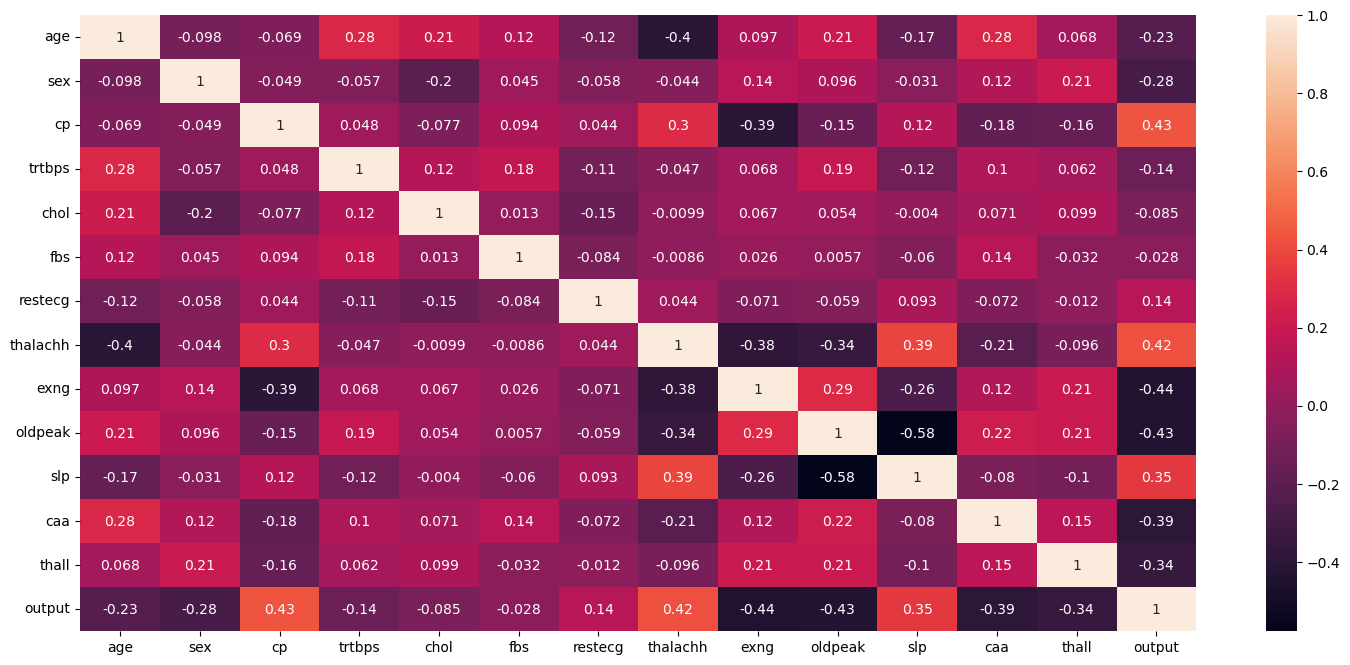

In [212]:
plt.figure(figsize=(18,8))
sns.heatmap(data=data.corr(),annot=True)

## Modelling

Test Train Split

In [213]:
x = data.drop('output',axis=1)
x.shape

(303, 13)

In [214]:
y = data['output']

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [217]:
x_train.shape

(227, 13)

In [218]:
x_test.shape

(76, 13)

In [219]:
y_train.shape

(227,)

In [220]:
y_test.shape

(76,)

In [150]:
#pip install lazypredict

In [225]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score


In [136]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

c:\Users\Hp\anaconda3\envs\aisoc1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
y_pred_lr.shape

(76,)

### Confusiom Matrix

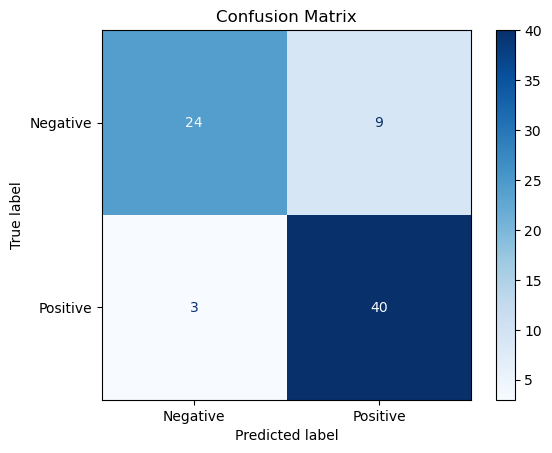

In [167]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### ROC Curve and AUC

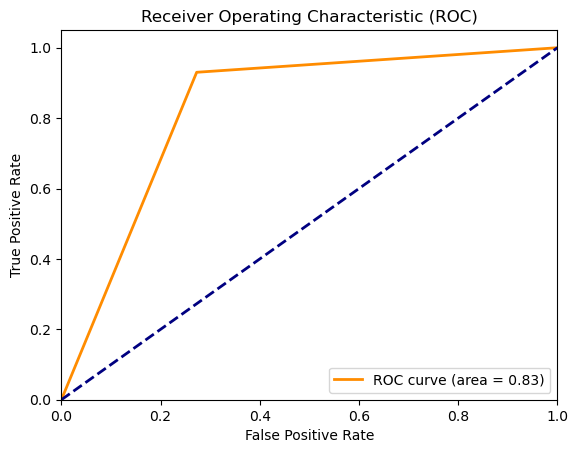

In [171]:
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [138]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.21 %


In [230]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    
    "random_state": 42,
#     "enable_categorical": True 
            }

fold = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lrv = LogisticRegression(**params)
    lrv.fit( x_train, y_train)
    randomlr = lrv.predict(x_test)
    
    acc_score= accuracy_score(y_test, randomlr)
    f1= f1_score(y_test, randomlr, average='weighted')
    recall= recall_score(y_test, randomlr, average='weighted')
    precision= precision_score(y_test, randomlr, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

#print("Accuracy Score is: ", np.mean(AccuracyScore))
#print("F1 Score is: ", np.mean(f1score))
#print("Recall Score is: ", np.mean(RecallScore))
#print("Precision Score is: ", np.mean(PrecisionScore))

print(f"Accuracy Score: {acc_score}")
print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")



Accuracy Score: 0.85
F1 Score: 0.8480000000000001
Recall Score: 0.85
Precision Score: 0.8505494505494505


Random Forest Classifier Model

In [139]:
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train, y_train)
    Y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [140]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train, y_train)
Y_pred_rf = rf.predict(x_test)

In [141]:
score_rf = round(accuracy_score(Y_pred_rf, y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 89.47 %


## Cros Vaidation for Random Forest

In [221]:
x.shape
y.shape


(303,)

In [227]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    "n_estimators": 500,
    "random_state": 42,
#     "enable_categorical": True 
            }

fold = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rfc = RandomForestClassifier(**params)
    rfc.fit( x_train, y_train)
    randomfc = rfc.predict(x_test)
    
    acc_score= accuracy_score(y_test, randomfc)
    f1= f1_score(y_test, randomfc, average='weighted')
    recall= recall_score(y_test, randomfc, average='weighted')
    precision= precision_score(y_test, randomfc, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

#print("Accuracy Score is: ", np.mean(AccuracyScore))
#print("F1 Score is: ", np.mean(f1score))
#print("Recall Score is: ", np.mean(RecallScore))
#print("Precision Score is: ", np.mean(PrecisionScore))

print(f"Accuracy Score: {acc_score}")
print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")



Accuracy Score: 0.8
F1 Score: 0.8
Recall Score: 0.8
Precision Score: 0.8


### Confusion Matrix

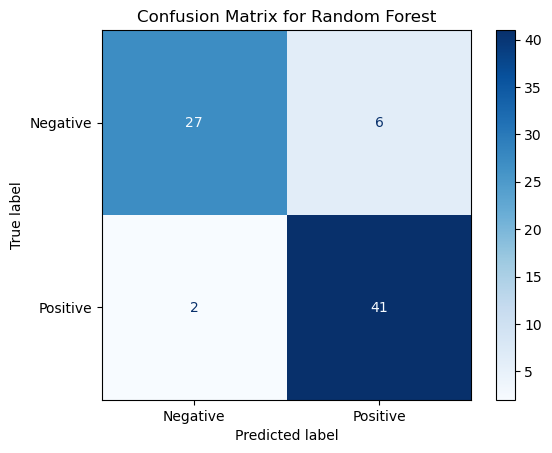

In [170]:
cm = confusion_matrix(y_test, Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

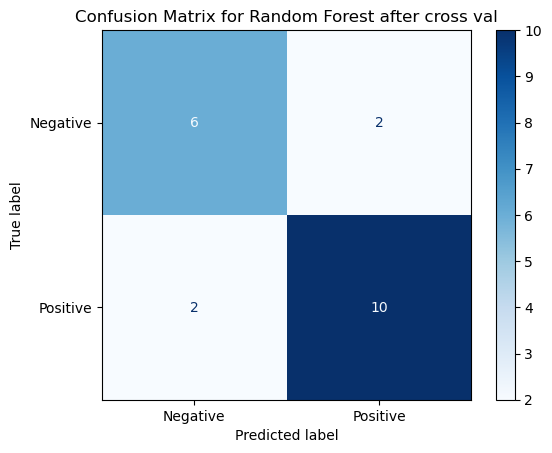

In [228]:
cm = confusion_matrix(y_test, randomfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest after cross val')
plt.show()

### ROC Curve and AUC for Random Forest

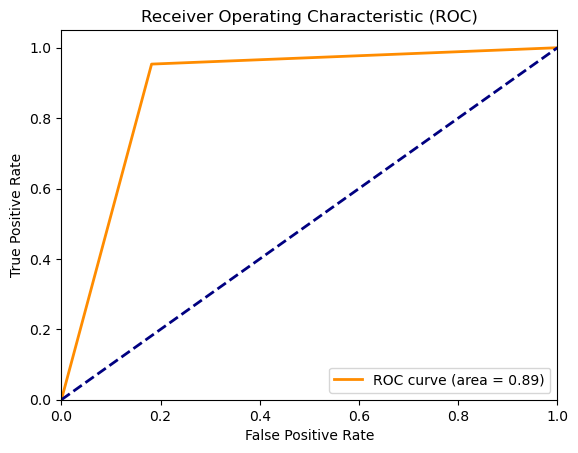

In [172]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# SVC

In [153]:

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)

In [154]:
score_svm = round(accuracy_score(Y_pred_svm, y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 84.21 %


In [238]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    
    "random_state": 42,
#     "enable_categorical": True 
            }

fold = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sv_cv = svm.SVC(kernel='linear', **params)
    sv_cv.fit( x_train, y_train)
    randomsv = sv_cv.predict(x_test)
    
    acc_score= accuracy_score(y_test, randomsv)
    f1= f1_score(y_test, randomsv, average='weighted')
    recall= recall_score(y_test, randomsv, average='weighted')
    precision= precision_score(y_test, randomsv, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

#print("Accuracy Score is: ", np.mean(AccuracyScore))
#print("F1 Score is: ", np.mean(f1score))
#print("Recall Score is: ", np.mean(RecallScore))
#print("Precision Score is: ", np.mean(PrecisionScore))

print(f"Accuracy Score: {acc_score}")
print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")



Accuracy Score: 0.85
F1 Score: 0.8480000000000001
Recall Score: 0.85
Precision Score: 0.8505494505494505


## Confusion Matrix

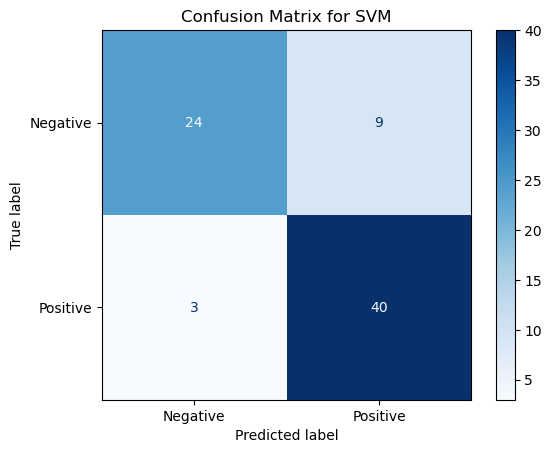

In [173]:
cm = confusion_matrix(y_test, Y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

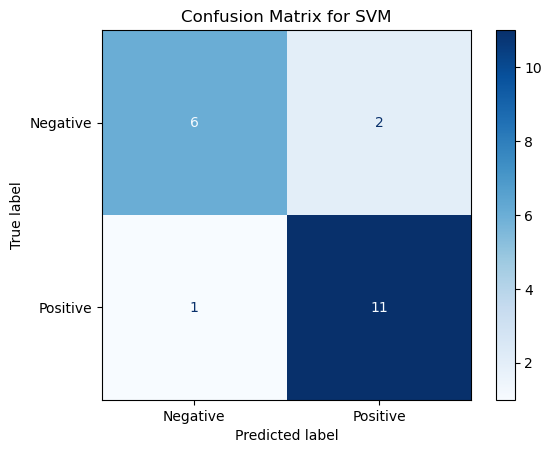

In [243]:
cm = confusion_matrix(y_test, randomsv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()

## ROC and AUC

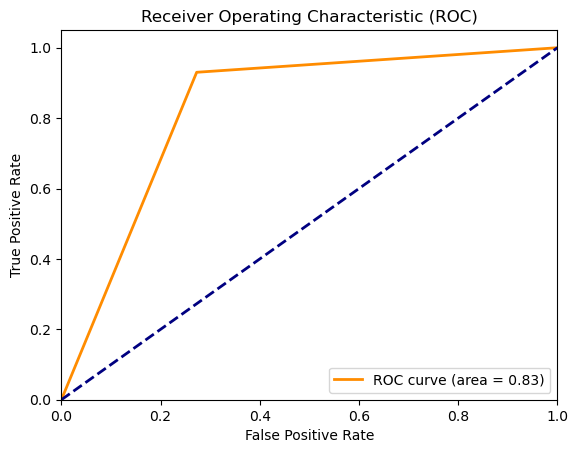

In [174]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

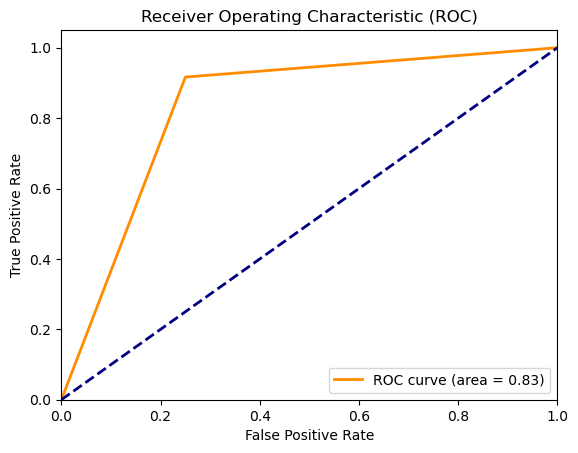

In [242]:
fpr, tpr, _ = roc_curve(y_test, randomsv)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## KNeighbors Model

In [155]:
knn=KNeighborsClassifier(n_neighbors= 5,metric='jaccard')

knn.fit(x_train, y_train)

Y_pred_knn = knn.predict(x_test)

In [156]:
score_knn = round(accuracy_score(Y_pred_knn, y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_knn)+" %")

The accuracy score achieved using Linear SVM is: 78.95 %


## Cross Validation

In [237]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
#    "n_estimators": 5,
#    "random_state": 42,
#     "enable_categorical": True 
            }

fold = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn_cv=KNeighborsClassifier(**params)
    knn_cv.fit( x_train, y_train)
    randomknn = knn_cv.predict(x_test)
    
    acc_score= accuracy_score(y_test, randomknn)
    f1= f1_score(y_test, randomknn, average='weighted')
    recall= recall_score(y_test, randomknn, average='weighted')
    precision= precision_score(y_test, randomknn, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

#print("Accuracy Score is: ", np.mean(AccuracyScore))
#print("F1 Score is: ", np.mean(f1score))
#print("Recall Score is: ", np.mean(RecallScore))
#print("Precision Score is: ", np.mean(PrecisionScore))

print(f"Accuracy Score: {acc_score}")
print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")



Accuracy Score: 0.75
F1 Score: 0.735042735042735
Recall Score: 0.75
Precision Score: 0.76


## Confusion Matrix

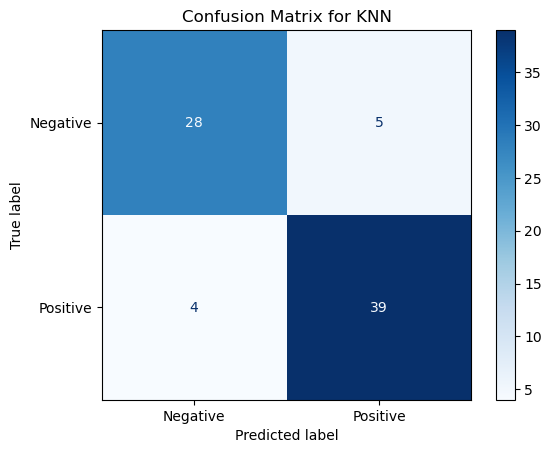

In [175]:
cm = confusion_matrix(y_test, Y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

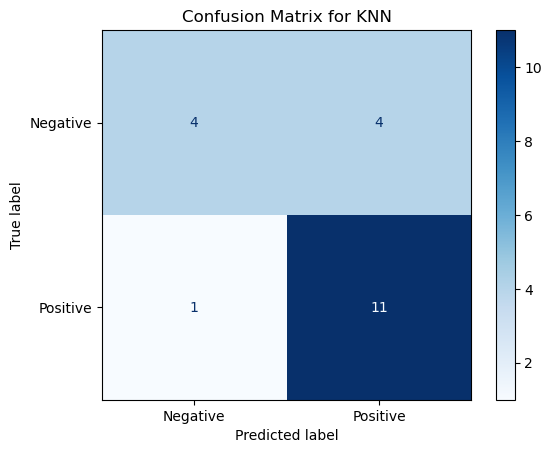

In [244]:
cm = confusion_matrix(y_test, randomknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN')
plt.show()

## ROC and AUC

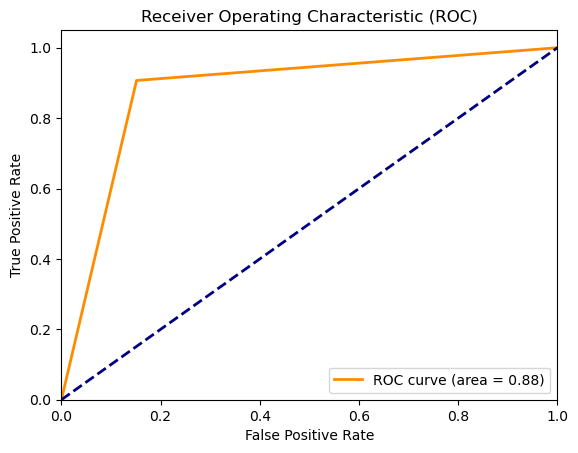

In [176]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

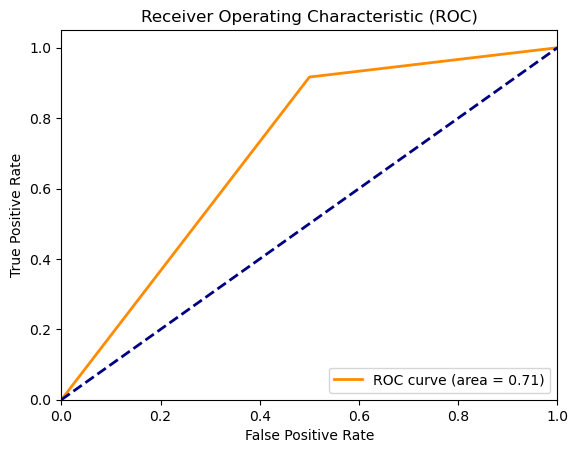

In [245]:
fpr, tpr, _ = roc_curve(y_test, randomknn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Making use of Lazy Predict

In [157]:
possible_algos = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = possible_algos.fit(x_train, x_test, y_train, y_test)

 97%|█████████▋| 30/31 [00:34<00:01,  1.91s/it]

[LightGBM] [Info] Number of positive: 122, number of negative: 105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.581871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537445 -> initscore=0.150061
[LightGBM] [Info] Start training from score 0.150061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████| 31/31 [00:49<00:00,  1.59s/it]


In [158]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.88,0.88,0.88,1.36
RandomForestClassifier,0.86,0.85,0.85,0.85,0.67
SVC,0.86,0.84,0.84,0.85,0.03
AdaBoostClassifier,0.84,0.84,0.84,0.84,1.80
NearestCentroid,0.84,0.83,0.83,0.84,0.06
NuSVC,0.84,0.83,0.83,0.84,0.28
BernoulliNB,0.83,0.82,0.82,0.83,0.24
QuadraticDiscriminantAnalysis,0.83,0.82,0.82,0.83,0.66
LinearDiscriminantAnalysis,0.83,0.82,0.82,0.83,8.83


In [161]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

clf.fit(x_train, y_train)

Y_pred_clf = clf.predict(x_test)

In [162]:
score_clf = round(accuracy_score(Y_pred_clf, y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_clf)+" %")

The accuracy score achieved using Linear SVM is: 88.16 %


In [163]:
def dataframe(y):
    vis={'Algorithm Name':[i for i in model_name],
     'Accuracy':y
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

## Cross Validation

In [239]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

params = {
    "n_estimators": 500,
    "random_state": 42,
#     "enable_categorical": True 
            }

fold = KFold(n_splits=15, shuffle=True, random_state=42)
for train_index, test_index in fold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf_cv = ExtraTreesClassifier(**params)
    clf_cv.fit( x_train, y_train)
    randomclf = clf_cv.predict(x_test)
    
    acc_score= accuracy_score(y_test, randomclf)
    f1= f1_score(y_test, randomclf, average='weighted')
    recall= recall_score(y_test, randomclf, average='weighted')
    precision= precision_score(y_test, randomclf, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

#print("Accuracy Score is: ", np.mean(AccuracyScore))
#print("F1 Score is: ", np.mean(f1score))
#print("Recall Score is: ", np.mean(RecallScore))
#print("Precision Score is: ", np.mean(PrecisionScore))

print(f"Accuracy Score: {acc_score}")
print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")
print(f"Precision Score: {precision}")



Accuracy Score: 0.8
F1 Score: 0.8
Recall Score: 0.8
Precision Score: 0.8


## Confusion Matrix

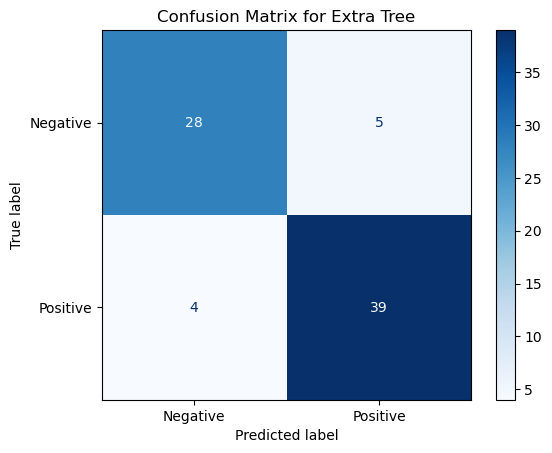

In [178]:
cm = confusion_matrix(y_test, Y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Extra Tree')
plt.show()

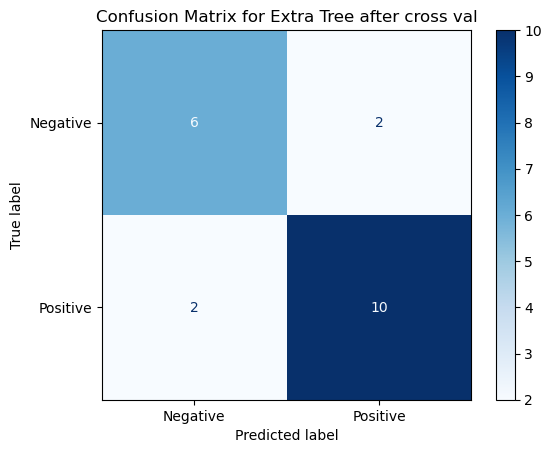

In [240]:
cm = confusion_matrix(y_test, randomclf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Extra Tree after cross val')
plt.show()

## ROC and AUC

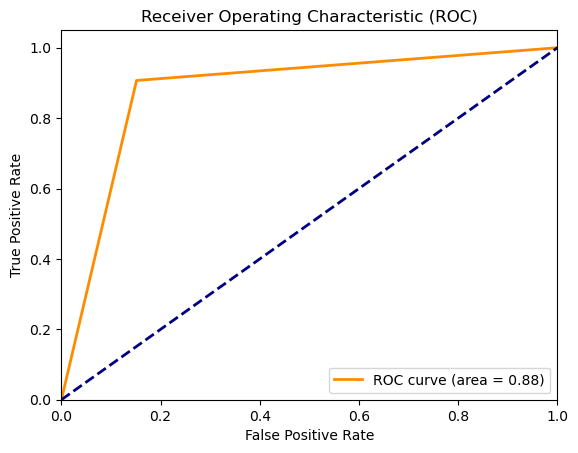

In [177]:
fpr, tpr, _ = roc_curve(y_test, Y_pred_clf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

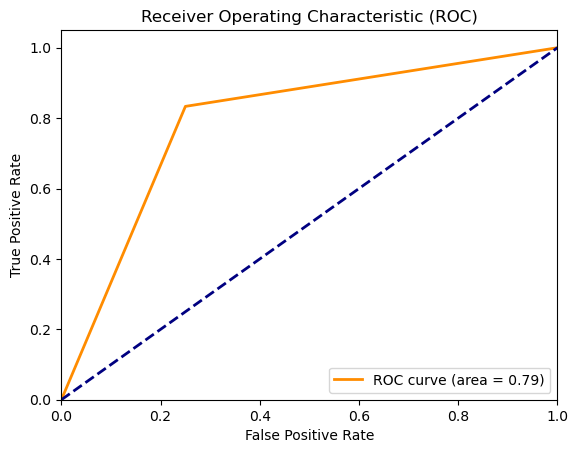

In [241]:
fpr, tpr, _ = roc_curve(y_test, randomclf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [246]:
import pickle

# Save the model
with open('lmodel.pkl', 'wb') as file:
    pickle.dump(lrv, file)


In [248]:
import pickle

# Load the model with the correct file name and extension
model = pickle.load(open("lmodel.pkl", 'rb'))


In [250]:
result = model.score(x_test, y_test)

print("Final Model Accuracy: ",result)

Final Model Accuracy:  0.85


In [252]:
#newdata = pd.DataFrame({
#    'age': [52], 'sex': [1], 'cp': [2], 'trestbps': [172], 'chol': [199],
#    'fbs': [1], 'restecg': [1], 'thalach': [162], 'exang': [0],
#    'oldpeak': [0.5], 'slp': [2], 'ca': [0], 'thall': [3]
#})


In [257]:
import pandas as pd
import pickle

# Load the model
model = pickle.load(open('lmodel.pkl', 'rb'))

# Define expected features
expected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                      'exang', 'oldpeak', 'slp', 'ca', 'thall']

# Create new data DataFrame
newdata = pd.DataFrame([{
    'age': 52, 'sex': 1, 'cp': 2, 'trestbps': 172, 'chol': 199, 'fbs': 1,
    'restecg': 1, 'thalach': 162, 'exang': 0, 'oldpeak': 0.5, 'slp': 2,
    'ca': 0, 'thall': 3
}])

# Ensure newdata has the correct columns and order
newdata = newdata.reindex(columns=expected_features)

# Predict
try:
    prediction1 = model.predict(newdata)
    print("Prediction:", prediction1)
except Exception as e:
    print("Error:", e)


Error: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ca
- exang
- thalach
- trestbps
Feature names seen at fit time, yet now missing:
- caa
- exng
- thalachh
- trtbps

